# Data Augmentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

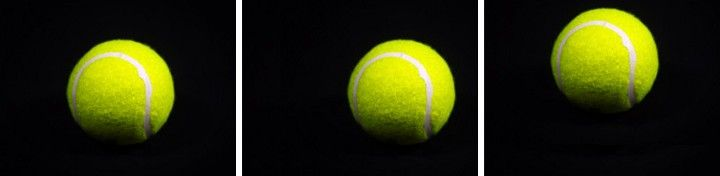



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









Keras is a Python library that allows you to develop and evaluate Deep Learning models. Keras supports numerical computing libraries like ***Theano*** and ***TensorFlow*** and allows you to define and train neural network models in a few lines of code.

Because of its ease-of-use and focus on user experience, Keras is the deep learning solution of choice for many university courses. It is widely recommended as one of the best ways to learn deep learning.

Keras is used by CERN, NASA, NIH, and many more scientific organizations around the world (and yes, Keras is used at the LHC). Keras has the low-level flexibility to implement arbitrary research ideas while offering optional high-level convenience features to speed up experimentation cycles.

The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

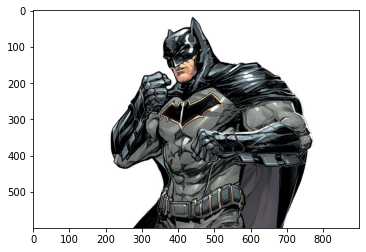

In [ ]:
url = 'https://www.smashmexico.com.mx/wp-content/uploads/2018/09/dc-top-5-momentos-raros-comics-batman-cover.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


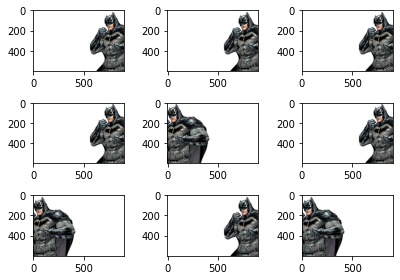

In [ ]:
# We convert the image to an arrangement
data = img_to_array(img)
# we make an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover
datagen = ImageDataGenerator(width_shift_range=[-350,350])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# we generate samples and display the results
	batch = it.next()
	image = batch[0].astype('uint8') # it is converted to a valid value to be able to display it as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **0vertical_flip** for the **ImageDataGenerator** class.

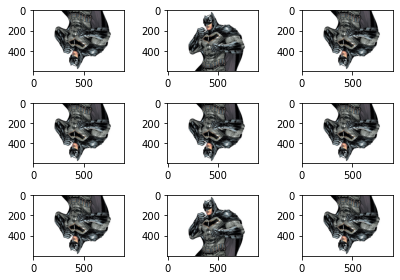

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

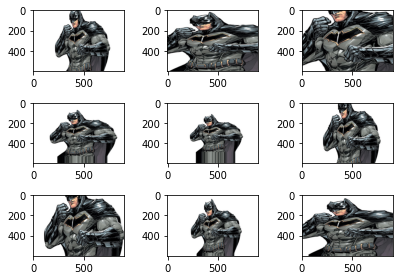

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.6) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

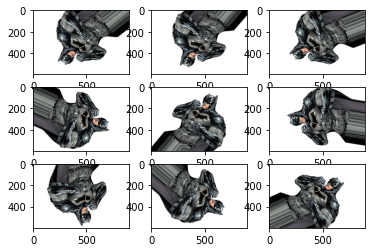

In [ ]:
datagen = ImageDataGenerator(rotation_range=250)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


               featurewise_center: Boolean, set the mean of each element to zero of all data.
               samplewise_center **: Boolean, set the mean of each sample to zero
               featurewise_std_normalization: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
               samplewise_std_normalization: Boolean, divide each data by its std.
               zca_epsilon: The default is 1e-6.
               zca_whitening: Boolean, indicates if ZCA whitening is applied.

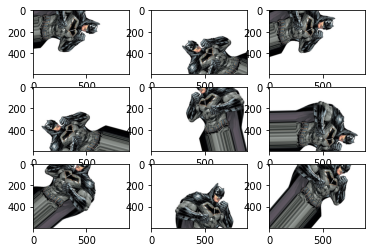

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 200,
            width_shift_range            = [100,100],   
            height_shift_range           = [150,150],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [ ]:
!pip install textattack

  Using cached https://files.pythonhosted.org/packages/05/12/aac3e1765db2445962b9ddcb64ea4a8cb18c68707a927f830ecae1a005c3/textattack-0.2.11-py3-none-any.whl
Processing /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e/word2number-1.1-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/8b/3a9e7a8d8cb14ad6afffc3983b7a7322a3a24d94ebc978a70746fcffc085/stanza-1.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/50/82/898d26ae4c7a8c2cb51dfc776c7b323b049981a08300d811e18ac12825a8/flair-0.6.0.post1-py3-none-any.whl
Processing /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e/terminaltables-3.1.0-cp36-none-any.whl
Processing /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc40252321fb6b/segtok-1.5.10-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/a1/05d7f62f956d77b23a640efc650f80ce24483aa2f85a09c03fb64f49e879/Deprecated-1.2.10-py2.

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [ ]:
text = "We try to catch up with the world, But we're so far out of reach "

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

["We attempt to catch up with the world, But we're so far out of reach "]


## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

["We try to catch up with the international, But we're so far out of reach "]

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

["We try to catch up with the worNd, But we're so far out of reach "]


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.

In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

["We try so catch up with the world, But we're to far out of reach ",
 "We try to catch up with the world, But we're so Interahamwe out of reach ",
 "We try to catch up with the world, we're so far out of reach ",
 "We try to catch up with only the world, But we're so far out of reach "]

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate()** method are:



1. **src**: source language. this parameter is optional as **googletrans** will detect it.
2. **dest**: target language. Mandatory parameter.

1. **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es


To obtain the best results, it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some lenguajes example's:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "The blacker the night, the brighter the stars"
text_trans = translator.translate(text=origin_text, dest='yi').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

The blacker the night, the brighter the stars
וואָס שוואַרץ די נאַכט, די ברייטער די שטערן
The blacker the night, the brighter the stars


In [ ]:
origin_text = "The blacker the night, the brighter the stars"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

The blacker the night, the brighter the stars
夜が黒くなるほど、星は明るくなります
The darker the night, the brighter the stars


In [ ]:
origin_text = "The blacker the night, the brighter the stars"
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

The blacker the night, the brighter the stars
Ju pli nigra estas la nokto, des pli brilas la steloj
The darker the night, the brighter the stars


In [ ]:
origin_text = "The blacker the night, the brighter the stars"
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

The blacker the night, the brighter the stars
Denigrata est nocte siderum fulgor
Has been blacked out in the night the gleam of the stars,
